In [2]:
%matplotlib inline

import os
import unicodedata
import pandas as pd

import numpy
import sympy

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation

from scipy.interpolate import make_interp_spline, BSpline
from scipy.ndimage.filters import gaussian_filter1d

from IPython.display import HTML
from IPython import display
s = sympy.symbols

In [3]:
graphs = []
log_path = "/home/datta/lab/Rethinking-Binarized-Neural-Network-Optimization/logs/hyperparameter_logs/pi/"
files = ["pit0g3","pit5g3","pit6g32"]
for file in files:
    df = pd.read_json(log_path+file+".json")
    df = df[[1, 2]]
    df['label'] = file.split(".json")[0]
    graphs.append(df)

def best_acc(df):
    return df[2].max()
    
sorted_graphs = sorted(graphs, key = best_acc, reverse=True)

pit0g3
pit6g32
pit5g3


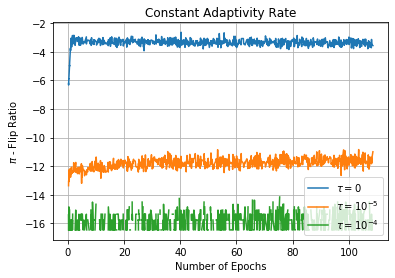

In [23]:
%matplotlib inline
fig, ax = plt.subplots(1, 1)
_ = plt.rcParams['figure.figsize'] = (15, 5)

colors = ["#1f77b4","#ff7f0e","#2ca02c"]
labels = []
for i, df in enumerate(sorted_graphs):
    plot = ax.plot(df[1]/909, df[2], colors[i])
    labels.append(df['label'][0])
    print(df['label'][0])

#     print(df['label'][0])
# _ = plt.ylim(0.8, 1)
_ = plt.title("Constant Adaptivity Rate")
_ = plt.grid(True)
_ = plt.xlabel("Number of Epochs")
_ = plt.ylabel(r'$\pi$'+ " - Flip Ratio")


labels = [
    r'$\tau = 0$',
    r'$\tau = 10^{-5}$',
    r'$\tau = 10^{-4}$'
]
#03 632 53
_ = ax.legend(labels, loc=4)


In [24]:
fig.savefig("./plots/flips_gamma_const_rect.png")

In [13]:
plot.get_colors()

AttributeError: 'Legend' object has no attribute 'get_colors'